In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_excel("marketing_data.xlsx")

In [16]:
df.shape

(2240, 22)

## Data Profiling

In [17]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [18]:
df['Income'] = df['Income'].fillna(0) # Assume that there are people with no income

In [19]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical) # These columns are subject for encoding except for Dt_customer 
# which will be validated later

There are 3 categorical variables

The categorical variables are : ['Education', 'Marital_Status', 'Dt_Customer']


In [20]:
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical) 

There are 19 numerical variables

The numerical variables are : ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain']


## Data Cleaning and Transformation

In [21]:
from datetime import datetime
quantified_year = df
quantified_year["Year_Birth"] = pd.to_datetime(quantified_year["Year_Birth"], format = "%Y") # convert the number to datetime object
year = datetime.now().year # the assumed threshold is 2024
quantified_year["Age"] = year - quantified_year['Year_Birth'].dt.year
quantified_year

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,1970-01-01,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,189,218,1,4,4,6,1,1,0,54
1,1,1961-01-01,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,37,1,7,3,7,5,1,0,63
2,10476,1958-01-01,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,2,30,1,3,2,5,2,0,0,66
3,1386,1967-01-01,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,1,1,0,2,7,0,0,57
4,5371,1989-01-01,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,0,34,2,3,1,2,7,1,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976-01-01,PhD,Divorced,66476.0,0,1,2013-07-03 00:00:00,99,372,...,48,78,2,5,2,11,4,0,0,48
2236,5263,1977-01-01,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,8,16,1,1,0,3,8,0,0,47
2237,22,1976-01-01,Graduation,Divorced,46310.0,1,0,2012-03-12 00:00:00,99,185,...,5,14,2,6,1,5,8,0,0,48
2238,528,1978-01-01,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,165,63,1,5,4,10,3,0,0,46


In [22]:
# Check the validity of Year_Birth and Dt_Customer and also check whether or not they are 18 years old.
def check_year_birth_before_dt_customer(df):
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], infer_datetime_format=True, errors='coerce')
    df = df.dropna(subset=['Dt_Customer'])
    df['Year_Birth'] = df['Year_Birth'].astype(str).str.extract('(\d+)')
    df['Year_Birth'] = pd.to_numeric(df['Year_Birth'], errors='coerce')
    
    df['Age_At_Registration'] = df['Dt_Customer'].dt.year - df['Year_Birth']
    filtered_df = df[(df['Year_Birth'] <= df['Dt_Customer'].dt.year) & (df['Age_At_Registration'] >= 18)]
    return filtered_df


validated_dt_customer = check_year_birth_before_dt_customer(quantified_year)
validated_dt_customer.dropna()
validated_dt_customer.drop(columns=['Year_Birth', 'Age_At_Registration'])
validated_dt_customer

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_31332\670858933.py:5: SyntaxWarning: invalid escape sequence '\d'
  df['Year_Birth'] = df['Year_Birth'].astype(str).str.extract('(\d+)')
C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_31332\670858933.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], infer_datetime_format=True, errors='coerce')
C:\Users\Shaun Padrejuan\AppData\Local\Temp\ipykernel_31332\670858933.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Age_At_Registration
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,218,1,4,4,6,1,1,0,54,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,37,1,7,3,7,5,1,0,63,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,30,1,3,2,5,2,0,0,66,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,1,1,0,2,7,0,0,57,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,34,2,3,1,2,7,1,0,35,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,...,78,2,5,2,11,4,0,0,48,37
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,16,1,1,0,3,8,0,0,47,36
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,...,14,2,6,1,5,8,0,0,48,36
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,63,1,5,4,10,3,0,0,46,34


In [23]:
def quantify_dt_customer(df):
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
    df['Year Of Enrollment'] = df['Dt_Customer'].dt.year
    df['Month Of Enrollment'] = df['Dt_Customer'].dt.month
    df['Day Of Enrollment'] = df['Dt_Customer'].dt.day
    return df

quantify_dt_customer(validated_dt_customer)
validated_dt_customer.drop(columns='Dt_Customer')
validated_dt_customer

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Age_At_Registration,Year Of Enrollment,Month Of Enrollment,Day Of Enrollment
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,4,6,1,1,0,54,44,2014,6,16
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,3,7,5,1,0,63,53,2014,6,15
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,5,2,0,0,66,56,2014,5,13
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,2,7,0,0,57,47,2014,11,5
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,1,2,7,1,0,35,25,2014,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,...,2,11,4,0,0,48,37,2013,7,3
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,3,8,0,0,47,36,2013,1,22
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,...,1,5,8,0,0,48,36,2012,3,12
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,4,10,3,0,0,46,34,2012,11,29


In [24]:
validated_dt_customer['Marital_Status'].unique() # Many unusual labels might mess up the model.

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [25]:
def standardize_status(df):
    df['Marital_Status'] = df['Marital_Status'].replace(['YOLO', 'Alone', 'Absurd'], 'Single')
    allowed_values = ['Single', 'Married', 'Widow', 'Divorced', 'Together'] 
    df = df[df['Marital_Status'].isin(allowed_values)]
    return df
# Married = Have gone through wedding, Together might mean Live-In or Fiance, so keep as label
standardized_status = standardize_status(validated_dt_customer)
standardized_status

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Age_At_Registration,Year Of Enrollment,Month Of Enrollment,Day Of Enrollment
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,4,6,1,1,0,54,44,2014,6,16
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,3,7,5,1,0,63,53,2014,6,15
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,5,2,0,0,66,56,2014,5,13
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,2,7,0,0,57,47,2014,11,5
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,1,2,7,1,0,35,25,2014,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,...,2,11,4,0,0,48,37,2013,7,3
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,3,8,0,0,47,36,2013,1,22
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,...,1,5,8,0,0,48,36,2012,3,12
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,4,10,3,0,0,46,34,2012,11,29


## Data Profiling but more focused on Customer Demographic

count      2237.000000
mean      51680.167635
std       25593.457517
min           0.000000
25%       34728.000000
50%       51039.000000
75%       68274.000000
max      666666.000000
Name: Income, dtype: float64

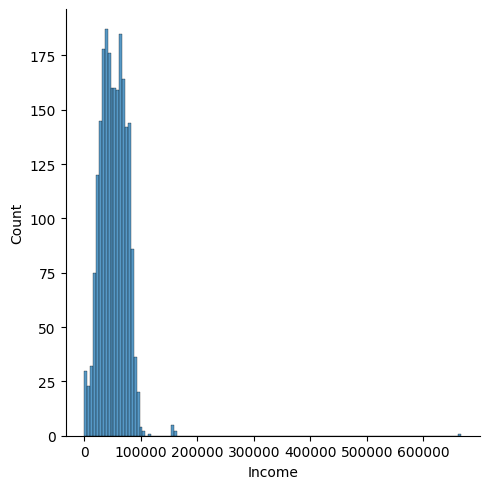

In [26]:
sns.displot(standardized_status['Income']) # possible outliers
standardized_status['Income'].describe()

In [27]:
# Dropping Outliers in Income using STD method
income = standardized_status['Income'].values
mean = np.mean(income)
std = np.std(income)

threshold_lower = mean - 2 * std
threshold_upper = mean + 2 * std

normalized_income = standardized_status[(standardized_status['Income'] >= threshold_lower) & (standardized_status['Income'] <= threshold_upper)]

count      2203.000000
mean      51573.533364
std       20621.026967
min        1730.000000
25%       35196.000000
50%       51267.000000
75%       68145.000000
max      102692.000000
Name: Income, dtype: float64

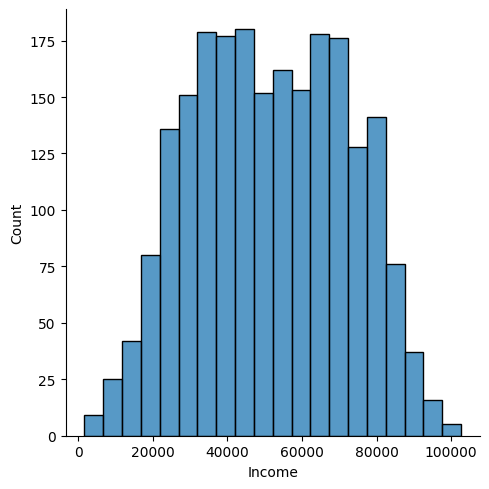

In [28]:
sns.displot(normalized_income['Income']) # reasonable prices
normalized_income['Income'].describe()

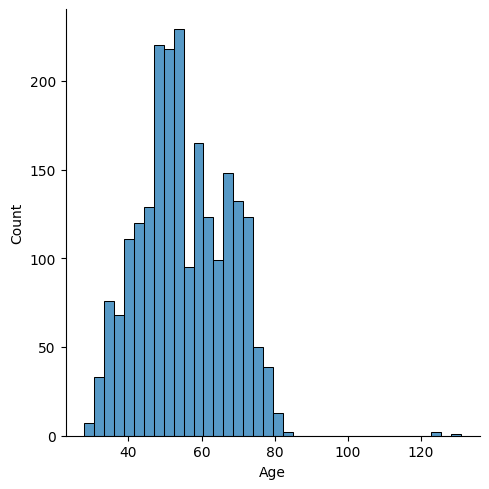

In [29]:
sns.displot(normalized_income['Age']) # There is someone over 100 y/o. 

In [30]:
## Same gist as before. Since we already filtered out underage customers, we now filter out the 95% of customers in terms of age.

def normalize_age (df):
    percentile = df['Age'].quantile(0.95)
    print("The 95% threshold is: ", percentile)
    filtered_data = df[(df['Age'] != 0) & (df['Age'] <= percentile)]
    return filtered_data

normalized_age = normalize_age(normalized_income)
normalized_age

The 95% threshold is:  74.0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Age_At_Registration,Year Of Enrollment,Month Of Enrollment,Day Of Enrollment
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,4,6,1,1,0,54,44,2014,6,16
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,3,7,5,1,0,63,53,2014,6,15
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,5,2,0,0,66,56,2014,5,13
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,2,7,0,0,57,47,2014,11,5
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,1,2,7,1,0,35,25,2014,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,...,2,11,4,0,0,48,37,2013,7,3
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,0,3,8,0,0,47,36,2013,1,22
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,...,1,5,8,0,0,48,36,2012,3,12
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,4,10,3,0,0,46,34,2012,11,29


count    2096.000000
mean       54.031489
std        10.841534
min        28.000000
25%        46.000000
50%        53.000000
75%        63.000000
max        74.000000
Name: Age, dtype: float64

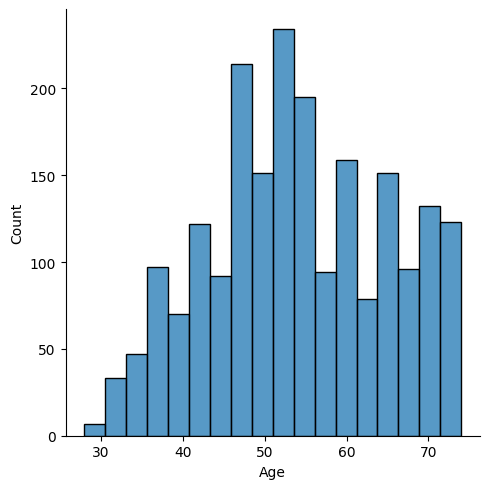

In [31]:
sns.displot(normalized_age['Age']) 
normalized_age['Age'].describe() 

## Exploratory Data Analysis